Scene Classification

Để làm quen với việc sử dụng các mô hình phân loại (KNN, Decision Tree, SVM) ,Bộ dữ liệu sử dụng trong bài toán là Scene-15. 

In [1]:
import numpy as np
import sklearn
import pickle

Trong thư mục bài tập này có 2 files chứa tập dữ liệu: file features.dump chứa các vector đặc trưng trích xuất từ bộ dữ liệu Scene-15, file labels.dump chứa nhãn tương ứng (gồm 15 nhãn):

In [2]:
features = np.array(pickle.load(open('features.dump', 'rb')))
labels = np.array(pickle.load(open('labels.dump', 'rb')))

print(type(features))
print(type(labels))

print(features.shape)
print(labels.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(4485, 1600)
(4485,)


Tiếp theo ta thực hiện một bước tiền xử lý đơn giản, đó là normalize dữ liệu: z = (x-u)/s

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(np.mean(features, axis=0))
print(np.std(features, axis=0))
features = scaler.fit_transform(features)
print(np.mean(features, axis=0))
print(np.std(features, axis=0))

[0.04840777 0.05592526 0.06561723 ... 0.05357086 0.050353   0.04555832]
[0.05357732 0.0567876  0.05932581 ... 0.0338027  0.03444253 0.03173965]
[ 4.20752248e-16 -3.38017735e-16  2.60258803e-16 ... -1.17239923e-15
 -5.20007052e-15 -3.80270570e-15]
[1. 1. 1. ... 1. 1. 1.]


Ta có thể thấy rằng bộ dữ liệu gồm 4485 mẫu dữ liệu. Mảng features là một ma trận 2 chiều kích thước 4485 x 960. Mỗi hàng của ma trận này là một vector đặc trưng 960 chiều (sử dụng đặc trưng GIST) của một ảnh. Mảng labels là một vector gồm 4485 phần tử, mỗi phần tử là một số nguyên trong khoảng [0, 14] miêu tả nhãn của mẫu tương ứng trong mảng features.

Ta sẽ chia tập dữ liệu thành 2 phần: tập dữ liệu huấn luyện (training set) và tập dữ liệu kiểm tra (testing set):

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test = train_test_split(features, labels, test_size=0.2)
print('Number of training data: ', x_train.shape[0])
print('Number of testing data: ', x_test.shape[0])

Number of training data:  3588
Number of testing data:  897


Thống kê dữ liệu

Việc chia tập dữ liệu thành 2 phần (training set và testing set) là hiệu quả nếu như phân bố dữ liệu ở các lớp của 2 tập và toàn bộ dữ liệu là tương đồng nhau. Hãy viết hàm statistic(y) dưới đây, nhận đầu vào là vector label của tập training hoặc testing, hàm trả về một vector gồm 15 phần tử tương ứng là số lượng mẫu dữ liệu thuộc từng lớp của bài toán:

In [7]:

def statistic(y):
    count = np.zeros(15)
    for i in range(y.shape[0]):
        count[y[i]]+=1
    return count

#Ví dụ: nếu y = [0, 1, 0, 2, 3, 1], thì hàm statistic(y) sẽ trả về mảng [2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

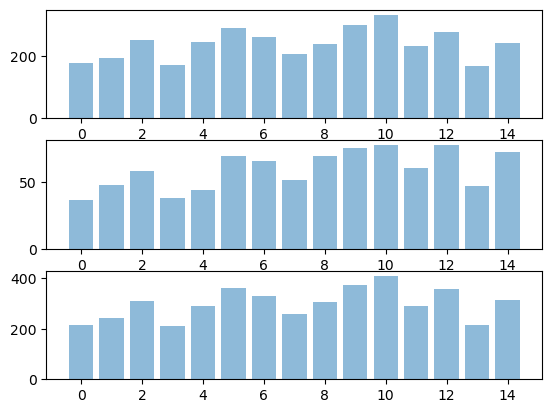

In [8]:
c_train = statistic(y_train)
c_test = statistic(y_test)
c_all = statistic(labels)

import matplotlib.pyplot as plt

plt.subplot(3, 1, 1), plt.bar(range(15), c_train, align='center', alpha=0.5)
plt.subplot(3, 1, 2), plt.bar(range(15), c_test, align='center', alpha=0.5)
plt.subplot(3, 1, 3), plt.bar(range(15), c_all, align='center', alpha=0.5)
plt.show()

II.Xây dựng các bộ phân loại sử dụng sklearn

 ta sẽ xây dựng các bộ phân loại KNN, Decision Tree, SVM cho bộ dữ liệu đề cập ở trên:

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

In [10]:
knn = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
print(knn)

knn.fit(x_train, y_train)
knn.score(x_test, y_test)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)


0.45261984392419174

Ngoài ra, ta có thể sử dụng phương pháp GridSearchCV để tìm kiếm hyper parameter tốt nhất cho mô hình:

In [16]:
knn = KNeighborsClassifier()

# Parameter list for grid searching
param = {'n_neighbors': [1, 2, 3, 4, 5]}
gs = GridSearchCV(estimator=knn, param_grid=param, cv=4, n_jobs=4)
# cv = fold crossvali , n_job= số luồng tính toán đa luồng
print(gs)

gs.fit(x_train, y_train)
gs.score(x_test, y_test)


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]})


0.48494983277591974

Tham số tốt nhất của mô hình:

In [18]:

gs.best_params_

{'n_neighbors': 1}

Thử lại với class KNN trong sklearn. So sánh kết quả:

In [22]:

knn_new = KNeighborsClassifier(n_neighbors=1)
knn_new.fit(x_train,y_train)
knn_new.score(x_test,y_test)

0.48494983277591974

Decision Tree
Tương tự như KNN,  xây dựng bộ phân loại sử dụng Decision Tree:

In [23]:

dt = DecisionTreeClassifier()
print(dt)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))


DecisionTreeClassifier()
0.999721293199554
0.3377926421404682


Sử dụng GridSearchCV, tìm kiếm các hyper parameter:

In [24]:

dt = DecisionTreeClassifier()
param = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'min_samples_leaf': [1, 5, 10]}
# gini = CART, entropy=ID3, splitter= phương pháp chia nhánh , min_samples_leaf = số lượng data tối thiểu cần có trong 1 lá 
gs = GridSearchCV(estimator=dt, param_grid=param, cv=4, n_jobs=4)
print(gs)

gs.fit(x_train, y_train)
gs.score(x_test, y_test)


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'splitter': ['best', 'random']})


0.3500557413600892

Tham số tốt nhất của mô hình:

In [25]:

gs.best_params_


{'criterion': 'entropy', 'min_samples_leaf': 10, 'splitter': 'best'}

Thử lại các tham số tốt nhất với class decision tree của sklearn:

In [29]:
dt.get_params()
param_new = {'criterion': 'entropy', 'splitter': 'best', 'min_samples_leaf': 10}
dt_new = DecisionTreeClassifier().set_params(**param_new)
dt_new.fit(x_train,y_train)
dt_new.score(x_test,y_test)

0.3600891861761427

Support Vector Machines
Tương tự như KNN và Decision Tree, xây dựng bộ phân loại sử dụng SVM:

In [16]:

svm = SVC(C = 20)
#C = phạt cho điểm data phân loại sai 
print(svm)

svm.fit(x_train, y_train)
print(svm.score(x_train, y_train))
print(svm.score(x_test, y_test))



SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.9512263099219621
0.693422519509476


Sử dụng GridSearchCV, tìm kiếm các hyper parameter:

In [17]:
#### YOUR CODE HERE ####
svm = SVC()
param = {'C': [0.5, 1, 5, 20, 100, 500], 'kernel': ['poly', 'rbf', 'sigmoid']}

gs = GridSearchCV(estimator=svm, param_grid=param, cv=4, n_jobs=4)
print(gs)

gs.fit(x_train, y_train)
gs.score(x_test, y_test)
#### END YOUR CODE #####

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'kernel': ['poly', 'rbf', 'sigmoid'], 'C': [0.5, 1, 5, 20, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)


0.705685618729097

Tham số tốt nhất của mô hình:

In [18]:
#### YOUR CODE HERE ####
gs.best_params_
#### END YOUR CODE #####

{'C': 5, 'kernel': 'rbf'}

Thử lại các tham số tốt nhất với class SVM của sklearn:

In [19]:
#### YOUR CODE HERE ####

#### END YOUR CODE #####